In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import sys

In [2]:
data_dir = "/home/vivek/Desktop/Vivek/Nitish_Course/Z_ConsolidatedResources/Trading/Module312/NitishCode/Data/"
ticker = "MARUTI.csv"
pd_data = pd.read_csv(data_dir + ticker)
pd_data = pd_data.dropna(how="any")

list_gbm_y_real = list(pd_data["Close"])
list_gbm_x_real = list(range(len(list_gbm_y_real)))

list_gbm_x = list_gbm_x_real
list_gbm_y = list_gbm_y_real

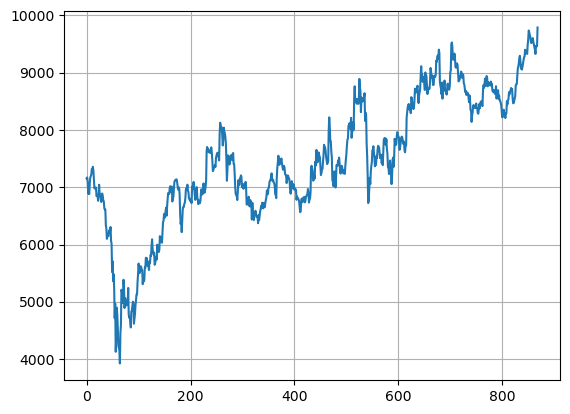

In [3]:
plt.plot(list_gbm_x, list_gbm_y)
plt.grid()

In [4]:
df_price = pd.DataFrame(list_gbm_y[:-1], columns = ["Price"])
df_price.head(2)

,Price
0,7153.508789
1,7171.266113


In [5]:
x = np.diff(list_gbm_y)
y = np.sign(x)
y, y.shape, x.shape
df_price["sign"] = y
df_price.head(2), df_price.shape

(         Price  sign
 0  7153.508789   1.0
 1  7171.266113  -1.0,
 (868, 2))

In [6]:
df_price.head(10), df_price.shape

(         Price  sign
 0  7153.508789   1.0
 1  7171.266113  -1.0
 2  7097.301758  -1.0
 3  6890.035156   1.0
 4  6920.560547  -1.0
 5  6882.991211   1.0
 6  7071.521973   1.0
 7  7171.901855   1.0
 8  7193.622070   1.0
 9  7226.983398   1.0,
 (868, 2))

In [7]:
list_data = []
for i in range(len(y)):
    data = np.array(y[i:i+10])
    list_data.append(data)
 
list_data

[array([ 1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.]),
 array([-1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.]),
 array([-1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.]),
 array([ 1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.]),
 array([-1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.]),
 array([ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.]),
 array([ 1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.]),
 array([ 1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.]),
 array([ 1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.]),
 array([ 1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.]),
 array([-1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.]),
 array([ 1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.]),
 array([-1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.]),
 array([-1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.]),
 array([-1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.]),
 array([ 1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.]),
 array([-1.,  1., -1.,  1.,  1., -1.,  1

In [8]:
df_data = pd.DataFrame(list_data, 
                       columns = ["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "y"])#.dropna(how="any")

df_data["Price"] = df_price["Price"]
df_data.shape

(868, 11)

In [18]:
df_data = df_data.dropna(how = "any")
df_data.tail(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,y,Price
849,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,9485.349609
850,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,9582.099609
851,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,9736.200195
852,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,9707.500000
853,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,9658.599609
854,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9627.799805
855,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,9550.450195
856,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9517.500000
857,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,9532.500000
858,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,9594.849609


In [10]:
X = df_data[["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9"]]
y = df_data["y"]
y.head(2), X.head(2)

(0    1.0
 1   -1.0
 Name: y, dtype: float64,
     f1   f2   f3   f4   f5   f6   f7   f8   f9
 0  1.0 -1.0 -1.0  1.0 -1.0  1.0  1.0  1.0  1.0
 1 -1.0 -1.0  1.0 -1.0  1.0  1.0  1.0  1.0  1.0)

In [11]:
n_test = int(len(X)*0.2)
X.shape, y.shape, type(X), type(y), len(X), n_test

X_train = X[:-n_test]
X_test = X[:n_test]

y_train = y[:-n_test]
y_test = y[:n_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

((688, 9), (171, 9), (688,), (171,))

In [12]:
y_train

0      1.0
1     -1.0
2      1.0
3     -1.0
4     -1.0
      ... 
683   -1.0
684    1.0
685    1.0
686   -1.0
687   -1.0
Name: y, Length: 688, dtype: float64

In [13]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
print(clf.score(X_train, y_train),  clf.score(X_test, y_test))

0.5276162790697675 0.5146198830409356


In [14]:
y_pred_test = df_data["Price"]

In [15]:
PriceSeries1 = list_gbm_y
#len(PriceSeries1)
list_test_closing_price = PriceSeries1[:n_test]

In [16]:
list_PnL = []
for t in range(len(list_test_closing_price)-1):
    #print(t)
    PnL = (list_test_closing_price[t+1] - list_test_closing_price[t])
    if y_pred_test[t] == 1:
        list_PnL.append(PnL)
    else:
        list_PnL.append(-1*PnL)

In [17]:
sum(list_PnL)

36.8876953125